In [125]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [126]:
train = pd.read_csv('train (1).csv', index_col=0)

In [127]:
train

,user_id,ts,gate_id
0,18,2022-07-29 09:08:54,7
1,18,2022-07-29 09:09:54,9
2,18,2022-07-29 09:09:54,9
3,18,2022-07-29 09:10:06,5
4,18,2022-07-29 09:10:08,5
...,...,...,...
37513,6,2022-12-31 20:38:56,11
37514,6,2022-12-31 20:39:22,6
37515,6,2022-12-31 20:39:23,6
37516,6,2022-12-31 20:39:31,9


In [128]:
test = pd.read_csv('test (1).csv', index_col=0)

In [129]:
test

,ts,gate_id,user_word
37518,2023-01-03 08:21:00,9,gini
37519,2023-01-03 08:21:00,9,gini
37520,2023-01-03 08:21:18,5,gini
37521,2023-01-03 08:21:19,5,gini
37522,2023-01-03 08:21:39,10,gini
...,...,...,...
44638,2023-02-24 19:43:36,11,collinear
44639,2023-02-24 19:44:00,4,collinear
44640,2023-02-24 19:44:01,4,collinear
44641,2023-02-24 19:44:09,9,collinear


In [130]:
all_data = pd.concat([train, test], axis=0)

In [131]:
all_data['user_word'].shape[0]

44643

In [132]:
# Доля тест во всей выборке

sum(all_data['user_word'].notnull()) / all_data['user_word'].shape[0]

0.1595994892816343

In [133]:
all_data['ts'] = pd.to_datetime(all_data['ts'])

<Axes: >

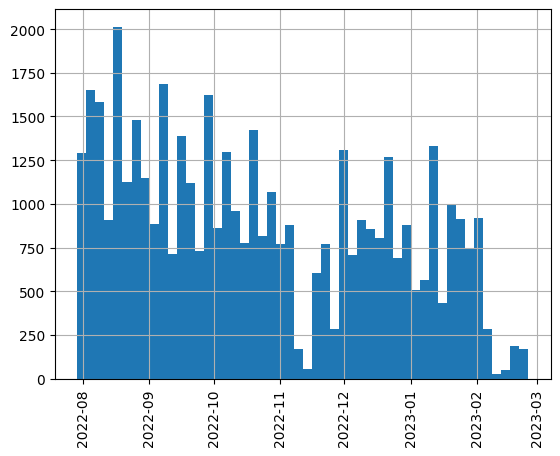

In [221]:
plt.figure()
plt.xticks(rotation='vertical')
all_data['ts'].hist(bins=50)

# Here we continue

In [135]:
train_gate_list = sorted(list(train['gate_id'].unique()))

In [136]:
test_gate_list = sorted(list(test['gate_id'].unique()))

In [137]:
only_test = [gate.item() for gate in test_gate_list if gate not in train_gate_list]

In [138]:
only_test

[2]

In [139]:
test[test['gate_id']==2]

,ts,gate_id,user_word
39911,2023-01-13 16:49:52,2,categorical
39912,2023-01-13 16:49:54,2,categorical
39928,2023-01-13 18:21:16,2,categorical
39929,2023-01-13 18:21:19,2,categorical


In [140]:
all_gates = sorted(list(all_data['gate_id'].unique()))
[one.item() for one in all_gates]

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [141]:
# Составим список турникетов вида "gate_номер"

list_gate_vars = ['gate_'+str(i) for i in all_gates]

In [142]:
# Теперь: cделаем бинарные переменные

new_vals = pd.get_dummies(all_data['gate_id']).values
new_vals

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(44643, 18))

In [143]:
# Припишем новые бинарные переменные "турникет" к полной выборке

all_data[list_gate_vars] = new_vals

In [144]:
# Список дней недели

list_dow = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [145]:
# Припишем новые бинарные переменные "день недели" к полной выборке

all_data[list_dow] = pd.get_dummies(all_data['ts'].dt.day_name())[list_dow].values

In [146]:
all_data['hour'] = all_data['ts'].dt.hour.values

In [147]:
# Список переменных вида "hour_час в полной выборке"

list_hours = ['hour_'+str(i) for i in sorted(list(all_data['ts'].dt.hour.unique()))]

In [ ]:
# Добавим бинарные переменные для месяца

all_data[list_hours] = pd.get_dummies(all_data['ts'].dt.hour.values).values

all_data['min'] = all_data['ts'].dt.minute.values
all_data['day'] = all_data['ts'].dt.day.values
all_data['month'] = all_data['ts'].dt.month.values
all_data['dayofweek'] = all_data['ts'].dt.dayofweek.values

In [153]:
all_data.columns

Index(['user_id', 'ts', 'gate_id', 'user_word', 'gate_-1', 'gate_0', 'gate_1',
       'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8',
       'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14',
       'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'hour', 'hour_0', 'hour_1', 'hour_3',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day',
       'month', 'dayofweek'],
      dtype='object')

In [154]:
train['ts'].agg(['max','count'])

max      2022-12-31 20:39:31
count                  37518
Name: ts, dtype: object

In [155]:
test['ts'].agg(['min','max','count'])

min      2023-01-03 08:21:00
max      2023-02-24 19:44:09
count                   7125
Name: ts, dtype: object

# Val index

In [156]:
val_index = train['ts'] > '2022-11-30'

In [157]:
sum(val_index) / val_index.shape[0]

0.18612399381630151

In [158]:
all_data.head(2)

,user_id,ts,gate_id,user_word,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day,month,dayofweek
0,18.0,2022-07-29 09:08:54,7,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,8,29,7,4
1,18.0,2022-07-29 09:09:54,9,NaN,False,False,False,False,False,False,...,False,False,False,False,False,False,9,29,7,4


In [159]:
train_idx = all_data['user_word'].isnull()
train = all_data.loc[train_idx]
test = all_data.loc[~train_idx]

In [160]:
train.tail(1)

,user_id,ts,gate_id,user_word,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day,month,dayofweek
37517,6.0,2022-12-31 20:39:31,9,NaN,False,False,False,False,False,False,...,False,False,True,False,False,False,39,31,12,5


In [161]:
test.head(1)

,user_id,ts,gate_id,user_word,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day,month,dayofweek
37518,NaN,2023-01-03 08:21:00,9,gini,False,False,False,False,False,False,...,False,False,False,False,False,False,21,3,1,1


In [162]:
X = train[~val_index].copy()
X_val = train[val_index].copy()

y = X['user_id'].astype(int)
y_val = X_val['user_id'].astype(int)

In [163]:
cols_cat = list(all_data.columns[4:])

In [164]:
X = X[cols_cat].astype(int)
X_val = X_val[cols_cat].astype(int)

In [165]:
X

,gate_-1,gate_0,gate_1,gate_2,gate_3,gate_4,gate_5,gate_6,gate_7,gate_8,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,min,day,month,dayofweek
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,8,29,7,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,7,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,7,4
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10,29,7,4
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,10,29,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,46,29,11,1
30531,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,50,29,11,1
30532,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,50,29,11,1
30533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,50,29,11,1


In [166]:
# Сделаем нормирование отдельными скейлерами по X и по X_val, т.к. будущие данные скорее всего изменятся

scaler_X = StandardScaler()
scaler_X_val = StandardScaler()

scaler_X.fit(X)
scaler_X_val.fit(X_val)

X_scaled = scaler_X.transform(X)
X_val_scaled = scaler_X_val.transform(X_val)

In [167]:
print('Признаки, всего', len(X.columns), list(X.columns))

Признаки, всего 51 ['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour', 'hour_0', 'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day', 'month', 'dayofweek']


In [46]:
clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

y_val_pred = clf.predict(X_val_scaled)

In [168]:
### my code #1
from catboost import CatBoostClassifier
CatBoostModel = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy', 
    random_seed=42,
    verbose=50
)

CatBoostModel.fit(X_scaled, y)

y_pred = CatBoostModel.predict(X_scaled)

y_val_pred = CatBoostModel.predict(X_val_scaled)

0:	learn: 0.1057148	total: 277ms	remaining: 1m 22s
50:	learn: 0.2275422	total: 6.74s	remaining: 32.9s
100:	learn: 0.2872441	total: 12.3s	remaining: 24.3s
150:	learn: 0.3460291	total: 18.1s	remaining: 17.9s
200:	learn: 0.3919764	total: 26.7s	remaining: 13.2s
250:	learn: 0.4281972	total: 36.4s	remaining: 7.11s
299:	learn: 0.4562961	total: 47.8s	remaining: 0us


In [169]:
# Сделаем словарь для val, наподобие того, который нужно предсказать (и обратный словарь)

y_val_list_words = {f'word_{i}': val.item() for i, val in enumerate(list(y_val.unique()))}
y_val_list_words_inverse = {val.item(): f'word_{i}' for i, val in enumerate(list(y_val.unique()))}

print("Forward:", dict(list(y_val_list_words.items())[:3]))
print("Inverse:", dict(list(y_val_list_words_inverse.items())[:3]))

Forward: {'word_0': 1, 'word_1': 39, 'word_2': 3}
Inverse: {1: 'word_0', 39: 'word_1', 3: 'word_2'}


In [170]:
# Сделаем словарь для train, наподобие того, который нужно предсказать (и обратный словарь)

y_train_list_words = {f'word_{i}': y.item() for i, y in enumerate(list(y.unique()))}
y_train_list_words_inverse = {y.item(): f'word_{i}' for i, y in enumerate(list(y.unique()))}

print("Forward:", dict(list(y_train_list_words.items())[:3]))
print("Inverse:", dict(list(y_train_list_words_inverse.items())[:3]))

Forward: {'word_0': 18, 'word_1': 1, 'word_2': 3}
Inverse: {18: 'word_0', 1: 'word_1', 3: 'word_2'}


In [171]:
# Превратим y_val и y в напободие того, что нужно предсказывать

y_val_word = y_val.copy()
y_word = y.copy()

y_val_word = y_val_word.map(y_val_list_words_inverse)
y_word = y_word.map(y_train_list_words_inverse)

In [172]:
y_val.head(3)

30535    1
30536    1
30537    1
Name: user_id, dtype: int64

In [173]:
y_val_word.head(3)

30535    word_0
30536    word_0
30537    word_0
Name: user_id, dtype: object

In [174]:
val_words = pd.DataFrame()

val_words['user_word'] = y_val_word
val_words['true'] = y_val
val_words['preds'] = y_val_pred

train_words = pd.DataFrame()

train_words['user_word'] = y_word
train_words['true'] = y
train_words['preds'] = y_pred

In [175]:
val_words

,user_word,true,preds
30535,word_0,1,18
30536,word_0,1,3
30537,word_0,1,3
30538,word_0,1,18
30539,word_0,1,18
...,...,...,...
37513,word_18,6,49
37514,word_18,6,33
37515,word_18,6,33
37516,word_18,6,49


In [176]:
# Предскажем самым частотным user_id

comp_df = pd.DataFrame(val_words.groupby('user_word')['preds'].agg(lambda x: x.value_counts().index[0]))

comp_df_train = pd.DataFrame(train_words.groupby('user_word')['preds'].agg(lambda x: x.value_counts().index[0]))

In [177]:
for idx in comp_df.index:
    comp_df.loc[idx, 'true'] = y_val_list_words[idx]

comp_df = comp_df.astype(int)

for idx in comp_df_train.index:
    comp_df_train.loc[idx, 'true'] = y_train_list_words[idx]

comp_df_train = comp_df_train.astype(int)

In [178]:
comp_df.head()

,preds,true
user_word,,
word_0,49,1
word_1,49,39
word_10,12,0
word_11,18,5
word_12,15,41


In [179]:
comp_df['comp'] = comp_df['preds'] == comp_df['true']

comp_df_train['comp'] = comp_df_train['preds'] == comp_df_train['true']

In [180]:
# Веса юзеров мы не знаем, давайте возьмем равные веса для простоты

comp_df['norm'] = 1

comp_df_train['norm'] = 1

In [184]:
true_answers = (comp_df['comp'] * comp_df['norm']).sum()
total_answers = comp_df['norm'].sum()
precent_true = round((true_answers / total_answers)*100, 1)

print('Оценка val', true_answers, '/', total_answers, '=', precent_true, '%')

Оценка val 5 / 43 = 11.6 %


In [182]:
# Train предсказуемо имеет более высокую метрику

In [183]:
true_answers_train = (comp_df_train['comp'] * comp_df_train['norm']).sum()
total_answers_train = comp_df_train['norm'].sum()
precent_true_train = round((true_answers_train/total_answers_train)*100, 1)
print('Оценка train', true_answers_train, '/', total_answers_train, '=', precent_true_train, '%')

Оценка train 49 / 50 = 98.0 %


In [185]:
comp_df_train

,preds,true,comp,norm
user_word,,,,
word_0,18,18,True,1
word_1,1,1,True,1
word_10,0,0,True,1
word_11,31,31,True,1
word_12,37,37,True,1
word_13,26,26,True,1
word_14,50,50,True,1
word_15,49,49,True,1
word_16,53,53,True,1


In [186]:
# На реальном тесте в задаче можно ожидать около 10% правильных ответов таким наивным подходом
# (но из-за весов значение метрики будет другим)

In [187]:
test['user_word']

37518         gini
37519         gini
37520         gini
37521         gini
37522         gini
           ...    
44638    collinear
44639    collinear
44640    collinear
44641    collinear
44642    collinear
Name: user_word, Length: 7125, dtype: object

In [188]:
X = train.copy()
y = X['user_id'].astype(int)
X_test = test.copy()

In [189]:
X = X[cols_cat].astype(int)
X_test = X_test[cols_cat].astype(int)

In [190]:
print('Признаки, всего', len(X.columns), list(X.columns))

Признаки, всего 51 ['gate_-1', 'gate_0', 'gate_1', 'gate_2', 'gate_3', 'gate_4', 'gate_5', 'gate_6', 'gate_7', 'gate_8', 'gate_9', 'gate_10', 'gate_11', 'gate_12', 'gate_13', 'gate_14', 'gate_15', 'gate_16', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'hour', 'hour_0', 'hour_1', 'hour_3', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'min', 'day', 'month', 'dayofweek']


In [191]:
# Сделаем нормирование отдельными скейлерами по X и по X_test, т.к. будущие данные скорее всего изменятся

scaler_X = StandardScaler()
scaler_X_test = StandardScaler()

scaler_X.fit(X)
scaler_X_test.fit(X_test)

X_scaled = scaler_X.transform(X)
X_test_scaled = scaler_X_test.transform(X_test)

In [68]:
clf = LogisticRegression(random_state=1,solver='saga').fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

y_test_pred = clf.predict(X_test_scaled)

In [192]:
### my code #1
from catboost import CatBoostClassifier
CatBoostModel = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    eval_metric='Accuracy', 
    random_seed=42,
    verbose=50
)

CatBoostModel.fit(X_scaled, y)

y_val_pred = CatBoostModel.predict(X_test_scaled)

0:	learn: 0.0922757	total: 186ms	remaining: 55.7s
50:	learn: 0.2221067	total: 9.52s	remaining: 46.5s
100:	learn: 0.2798390	total: 18.5s	remaining: 36.4s
150:	learn: 0.3337864	total: 25.9s	remaining: 25.5s
200:	learn: 0.3748601	total: 35s	remaining: 17.2s
250:	learn: 0.4039928	total: 42.9s	remaining: 8.38s
299:	learn: 0.4291007	total: 51.4s	remaining: 0us


In [197]:
probs = CatBoostModel.predict_proba(X_test_scaled)
max_probs = probs.max(axis=1)

In [215]:
test_words = pd.DataFrame()

test_words['user_word'] = test['user_word']
test_words['preds'] = y_test_pred
#test_words['max_prob'] = max_probs

#threshold = 0.1
#test_words.loc[test_words['max_prob'] < threshold, 'preds'] = -999

In [216]:
test_words

,user_word,preds
37518,gini,18
37519,gini,18
37520,gini,15
37521,gini,15
37522,gini,18
...,...,...
44638,collinear,17
44639,collinear,17
44640,collinear,17
44641,collinear,14


In [217]:
# Предскажем самым частотным user_id
    
comp_df_test = pd.DataFrame(test_words.groupby('user_word')['preds'].agg(lambda x: x.value_counts().index[0]))

In [218]:
comp_df_test

,preds
user_word,
aucroc,49
binary,12
blue,55
categorical,14
coefficient,15
collinear,12
distributed,12
epsilon,1
f1,37


In [219]:
comp_df_test.shape[0]

34

In [220]:
comp_df_test.to_csv('answer.csv')

# Получится на борде 82, при равенстве весов (что не так), получилось бы 82 / (540/34)
# примерно 5 правильных user_id (но наверное больше, т.к. отгадали самые простые)

In [119]:
82 / (560/34)

4.978571428571429